### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

How prices vary with the features of the car ?

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

### Business goal

You are required to model the price of cars with the available independent variables beneficial for the business strategy.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

In [2]:
#reading data
df = pd.read_csv('CarPrice_Assignment.csv', index_col= 'car_ID')
df.head()

symboling                   CarName fueltype aspiration doornumber  \
car_ID                                                                       
1               3        alfa-romero giulia      gas        std        two   
2               3       alfa-romero stelvio      gas        std        two   
3               1  alfa-romero Quadrifoglio      gas        std        two   
4               2               audi 100 ls      gas        std       four   
5               2                audi 100ls      gas        std       four   

            carbody drivewheel enginelocation  wheelbase  carlength  ...  \
car_ID                                                               ...   
1       convertible        rwd          front       88.6      168.8  ...   
2       convertible        rwd          front       88.6      168.8  ...   
3         hatchback        rwd          front       94.5      171.2  ...   
4             sedan        fwd          front       99.8      176.6  ...   
5             sedan        4wd          front       99.4      176.6  ...   

        enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
car_ID                                                                          
1              130        mpfi       3.47   2.68              9.0         111   
2              130        mpfi       3.47   2.68              9.0         111   
3              152        mpfi       2.68   3.47              9.0         154   
4              109        mpfi       3.19   3.40             10.0         102   
5              136        mpfi       3.19   3.40              8.0         115   

       peakrpm  citympg  highwaympg    price  
car_ID                                        
1         5000       21          27  13495.0  
2         5000       21          27  16500.0  
3         5000       19          26  16500.0  
4         5500       24          30  13950.0  
5         5500       18          22  17450.0  

[5 rows x 25 columns]

In [3]:
#size of data
df.shape

(205, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [5]:
#checking for null values
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
#statistics of the data
df.describe()

symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

### Univariate Analysis

Text(0.5, 1.0, 'Car price spread')

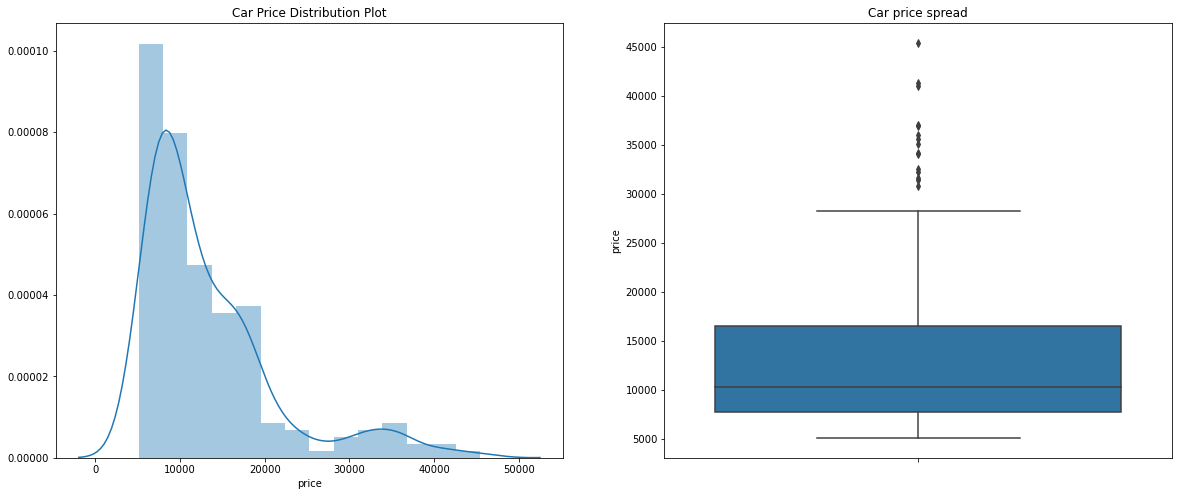

In [7]:
#1. Analyzing the target feature: CarPrice

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(df['price'])
plt.title('Car Price Distribution Plot')

plt.subplot(1,2,2)
sns.boxplot(y= df['price'])
plt.title('Car price spread')

Right skewed distribution of price feature

In [8]:
df['price'].skew()

1.7776781560914454

In [9]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

INFERENCE:

Plot is right skewed. (Mode < Median < Mean. Most prices in the dataset are below Rs 15000

The data points are far spread out from the mean, which indicates a high variance in the car prices.(75% of the prices are below 16,503, whereas the remaining 15% are between 18,500 and 45,400.

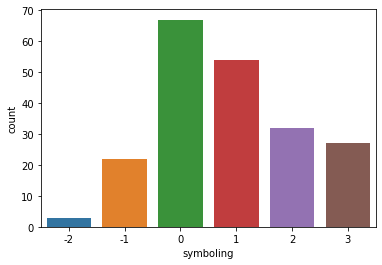

In [11]:
#2. symboling
sns.countplot(df['symboling'])

In [12]:
#3. CarName
df.CarName

car_ID
1            alfa-romero giulia
2           alfa-romero stelvio
3      alfa-romero Quadrifoglio
4                   audi 100 ls
5                    audi 100ls
                 ...           
201             volvo 145e (sw)
202                 volvo 144ea
203                 volvo 244dl
204                   volvo 246
205                 volvo 264gl
Name: CarName, Length: 205, dtype: object

The carname column contains the name of the car and the name of the company as well. Thus, separating the two

In [13]:
# df['CarName'].apply(lambda x: x.split("-")[0]) or 
df['CarCompany'] = df['CarName'].apply(lambda x: x.split(" ")[0])
df['CarCompany']

car_ID
1      alfa-romero
2      alfa-romero
3      alfa-romero
4             audi
5             audi
          ...     
201          volvo
202          volvo
203          volvo
204          volvo
205          volvo
Name: CarCompany, Length: 205, dtype: object

In [14]:
px.bar(x= df['CarCompany'].value_counts().index, y= df['CarCompany'].value_counts().values, title= 'Distribution of car companies')

Some names of the car companies are spelled incorrectly, it should be corrected.

In [15]:
df['CarCompany'] = df['CarCompany'].str.lower()

df['CarCompany'] = df['CarCompany'].replace({'toyouta': 'toyota', 'Nissan': 'nissan', 'maxda': 'mazda', 'vokswagen': 'volkswagen',
                                      'vw': 'volkswagen', 'porcshce': 'porsche'})


In [16]:
px.bar(x= df['CarCompany'].value_counts().index, y= df['CarCompany'].value_counts().values, title= 'Distribution of car companies')

In [17]:
#checking for duplicates
df.loc[df.duplicated()]

Empty DataFrame
Columns: [symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price, CarCompany]
Index: []

[0 rows x 26 columns]

No duplicate records in the data

In [18]:
#4. FuelType
px.bar(x= df['fueltype'].value_counts().index, y= df['fueltype'].value_counts().values, title= 'Fuel type distribution')

In [19]:
#5. Aspiration
px.bar(x= df['aspiration'].value_counts().index, y= df['aspiration'].value_counts().values, title= 'Aspiration distribution')

In [20]:
#7. carbody
px.bar(x= df.carbody.value_counts().index, y= df['carbody'].value_counts().values, title= 'Car Body distribution')

In [21]:
#8.
px.bar(x= df.drivewheel.value_counts().index, y= df['drivewheel'].value_counts().values, title= 'Drive wheel distribution of cars')

In [22]:
#9.Engine location
px.bar(x= df.enginelocation.value_counts().index, y= df['enginelocation'].value_counts().values, title= 'Engine Location of cars')

INFERENCES:

1. Toyota seemed to be a favoured car company
2. Number of gas fueled cars are more than diesel
3. Sedan is in most demand
4. Cars with four doors are more in demand
5. All wheel drives are more in demand
6. Only three rear side location of engines in cars in the dataset

In [23]:
#10. Engine type
px.bar(df['enginetype'].value_counts().index, y= df['enginetype'].value_counts().values, title= 'Engine type distribution of cars')

In [24]:
#11. Cylinder number
px.bar(df.cylindernumber.value_counts().index, y= df['cylindernumber'].value_counts().values, title= 'Cylinder number distribution')

### Bivariate and Multivariate Analysis

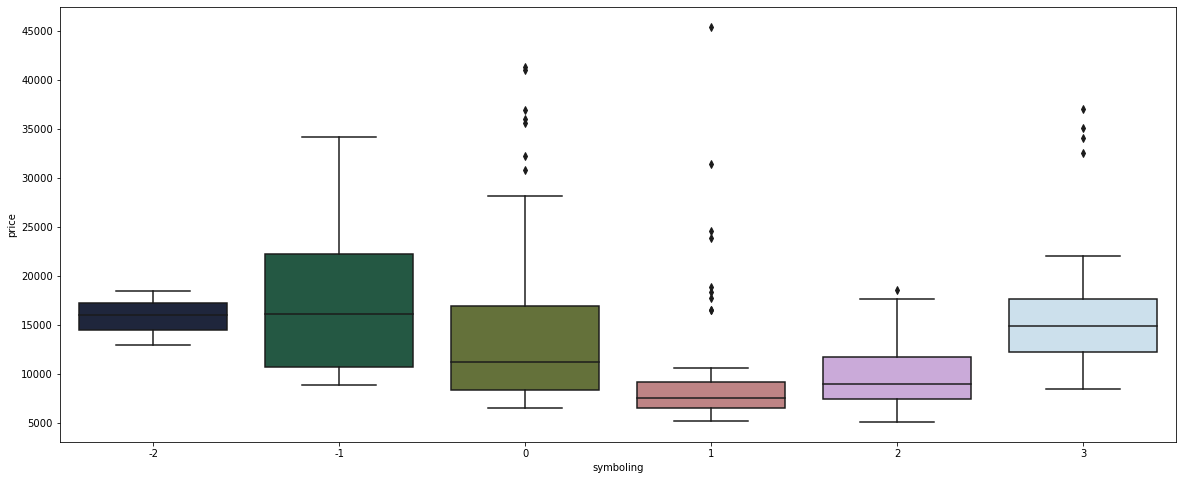

In [25]:
#1. Symboling vs Price

plt.figure(figsize=(20,8))
sns.boxplot(x= df['symboling'], y= df['price'], palette = 'cubehelix')

INFERENCE :

1. It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
2. The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1

In [26]:
#2. Engine type vs Price
px.bar(df.groupby(by= 'enginetype')['price'].mean().sort_values(ascending= False))

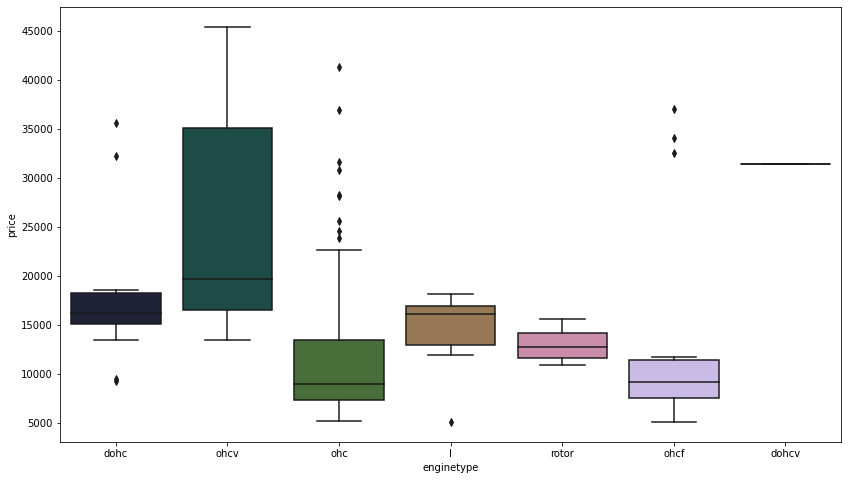

In [27]:
plt.figure(figsize=(14,8))
sns.boxplot(x= df['enginetype'], y= df['price'], palette = 'cubehelix')

INFERENCE:

1. ohc Engine type seems to be most favored type.
2. ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.

In [28]:
#3. Company Name vs Price
px.bar(df.groupby('CarCompany')['price'].mean().sort_values(ascending= False), title= 'Company name vs Price')

In [29]:
#4. Fuel Type vs Average Price
px.bar(df.groupby('CarCompany')['price'].mean().sort_values(ascending= False), title= 'Fuel type vs Average price')

In [30]:
#4. Carbody Type vs Average Price
px.bar(df.groupby('carbody')['price'].mean().sort_values(ascending= False), title= 'Car Body type vs Average price')

INFERENCE:

1. Jaguar and Buick seem to have highest average price.
2. diesel has higher average price than gas.
3. hardtop and convertible have higher average price.

Text(0.5, 1.0, 'Aspiration vs Price')

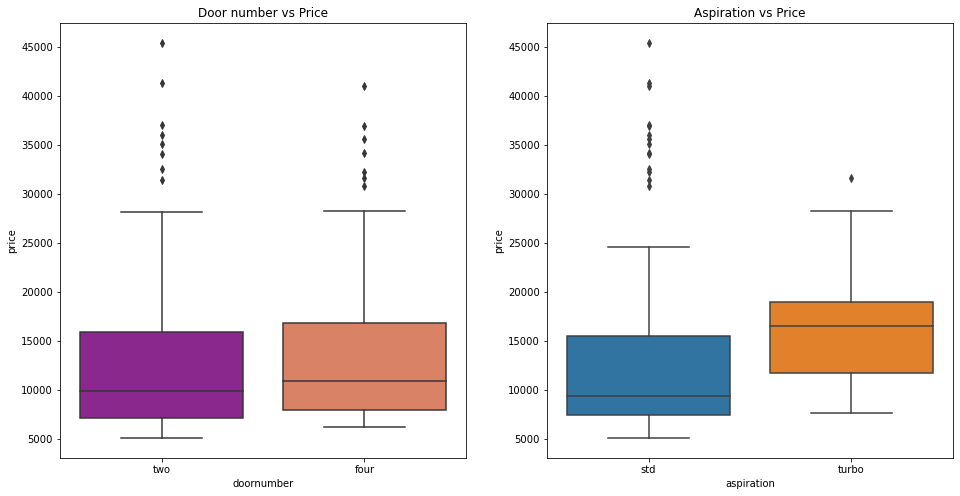

In [31]:
#5. Door number vs Price
#6. Aspiration vs Price

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
sns.boxplot(x= df['doornumber'], y= df['price'], palette= 'plasma')
plt.title('Door number vs Price')

plt.subplot(1,2,2)
sns.boxplot(x= df['aspiration'], y= df['price'])
plt.title('Aspiration vs Price')

INFERENCE :
1. doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.
2. It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)

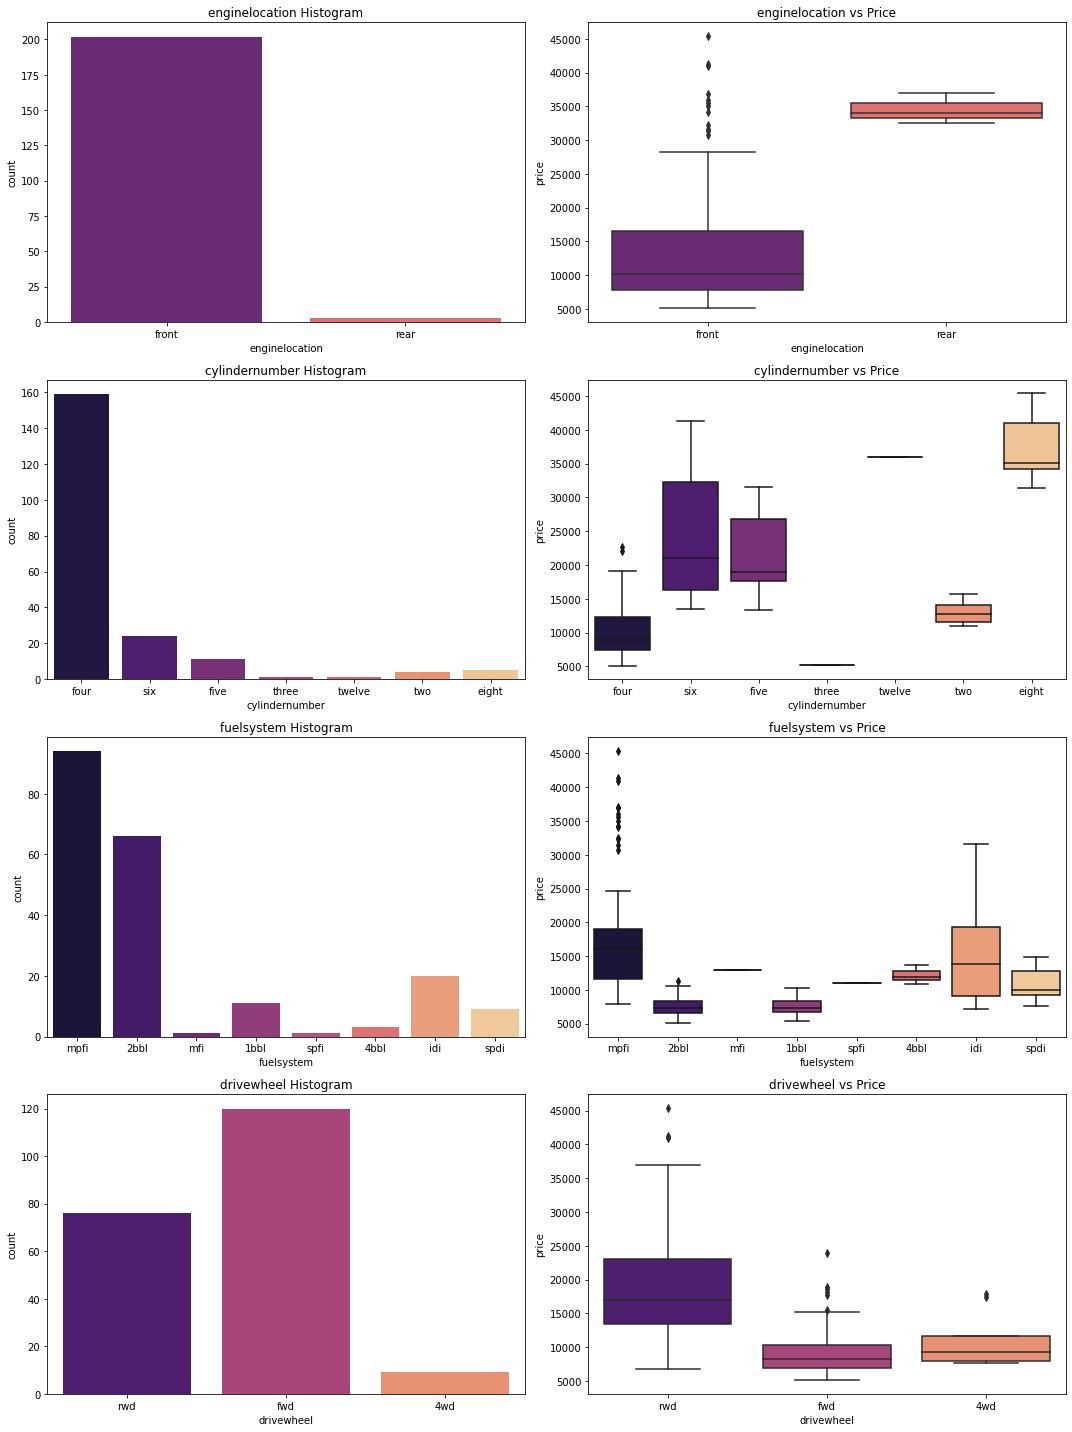

In [32]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(df[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=df[x], y=df.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

INFERENCE:
    
1. Very few datapoints for enginelocation categories to make an inference.
2. Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
3. mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference
4. A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

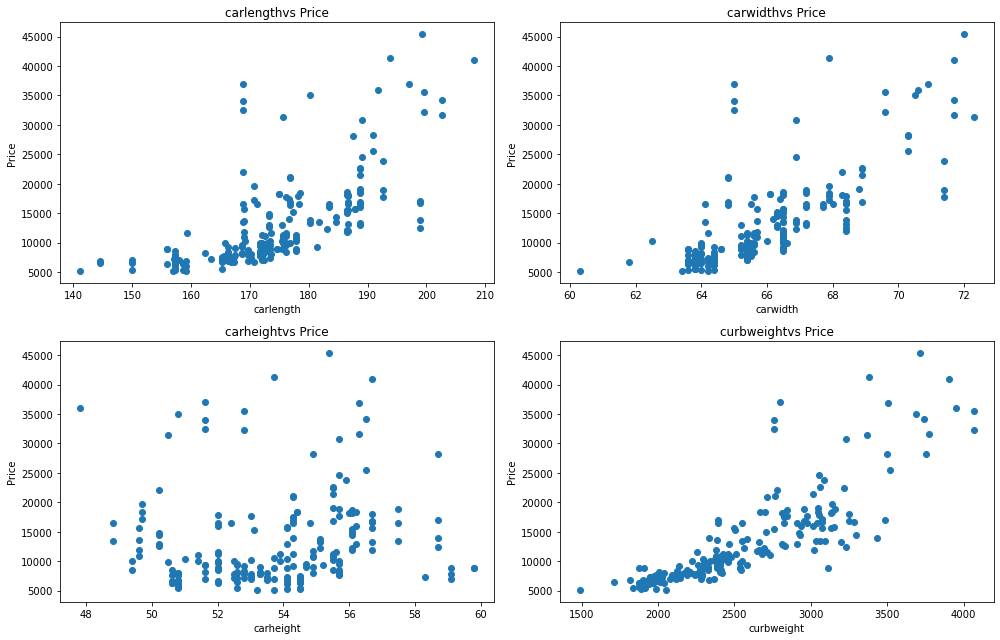

In [33]:
def scatter_plot(x, fig):
    plt.subplot(2,2,fig)
    plt.scatter(df[x], df['price'])
    plt.title(x + 'vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)
    
plt.figure(figsize=(14,9))

scatter_plot('carlength',1)
scatter_plot('carwidth',2)
scatter_plot('carheight',3)
scatter_plot('curbweight',4)

plt.tight_layout()

INFERENCE:

1. carwidth, carlength and curbweight seems to have a poitive correlation with price.
2. carheight doesn't show any significant trend with price

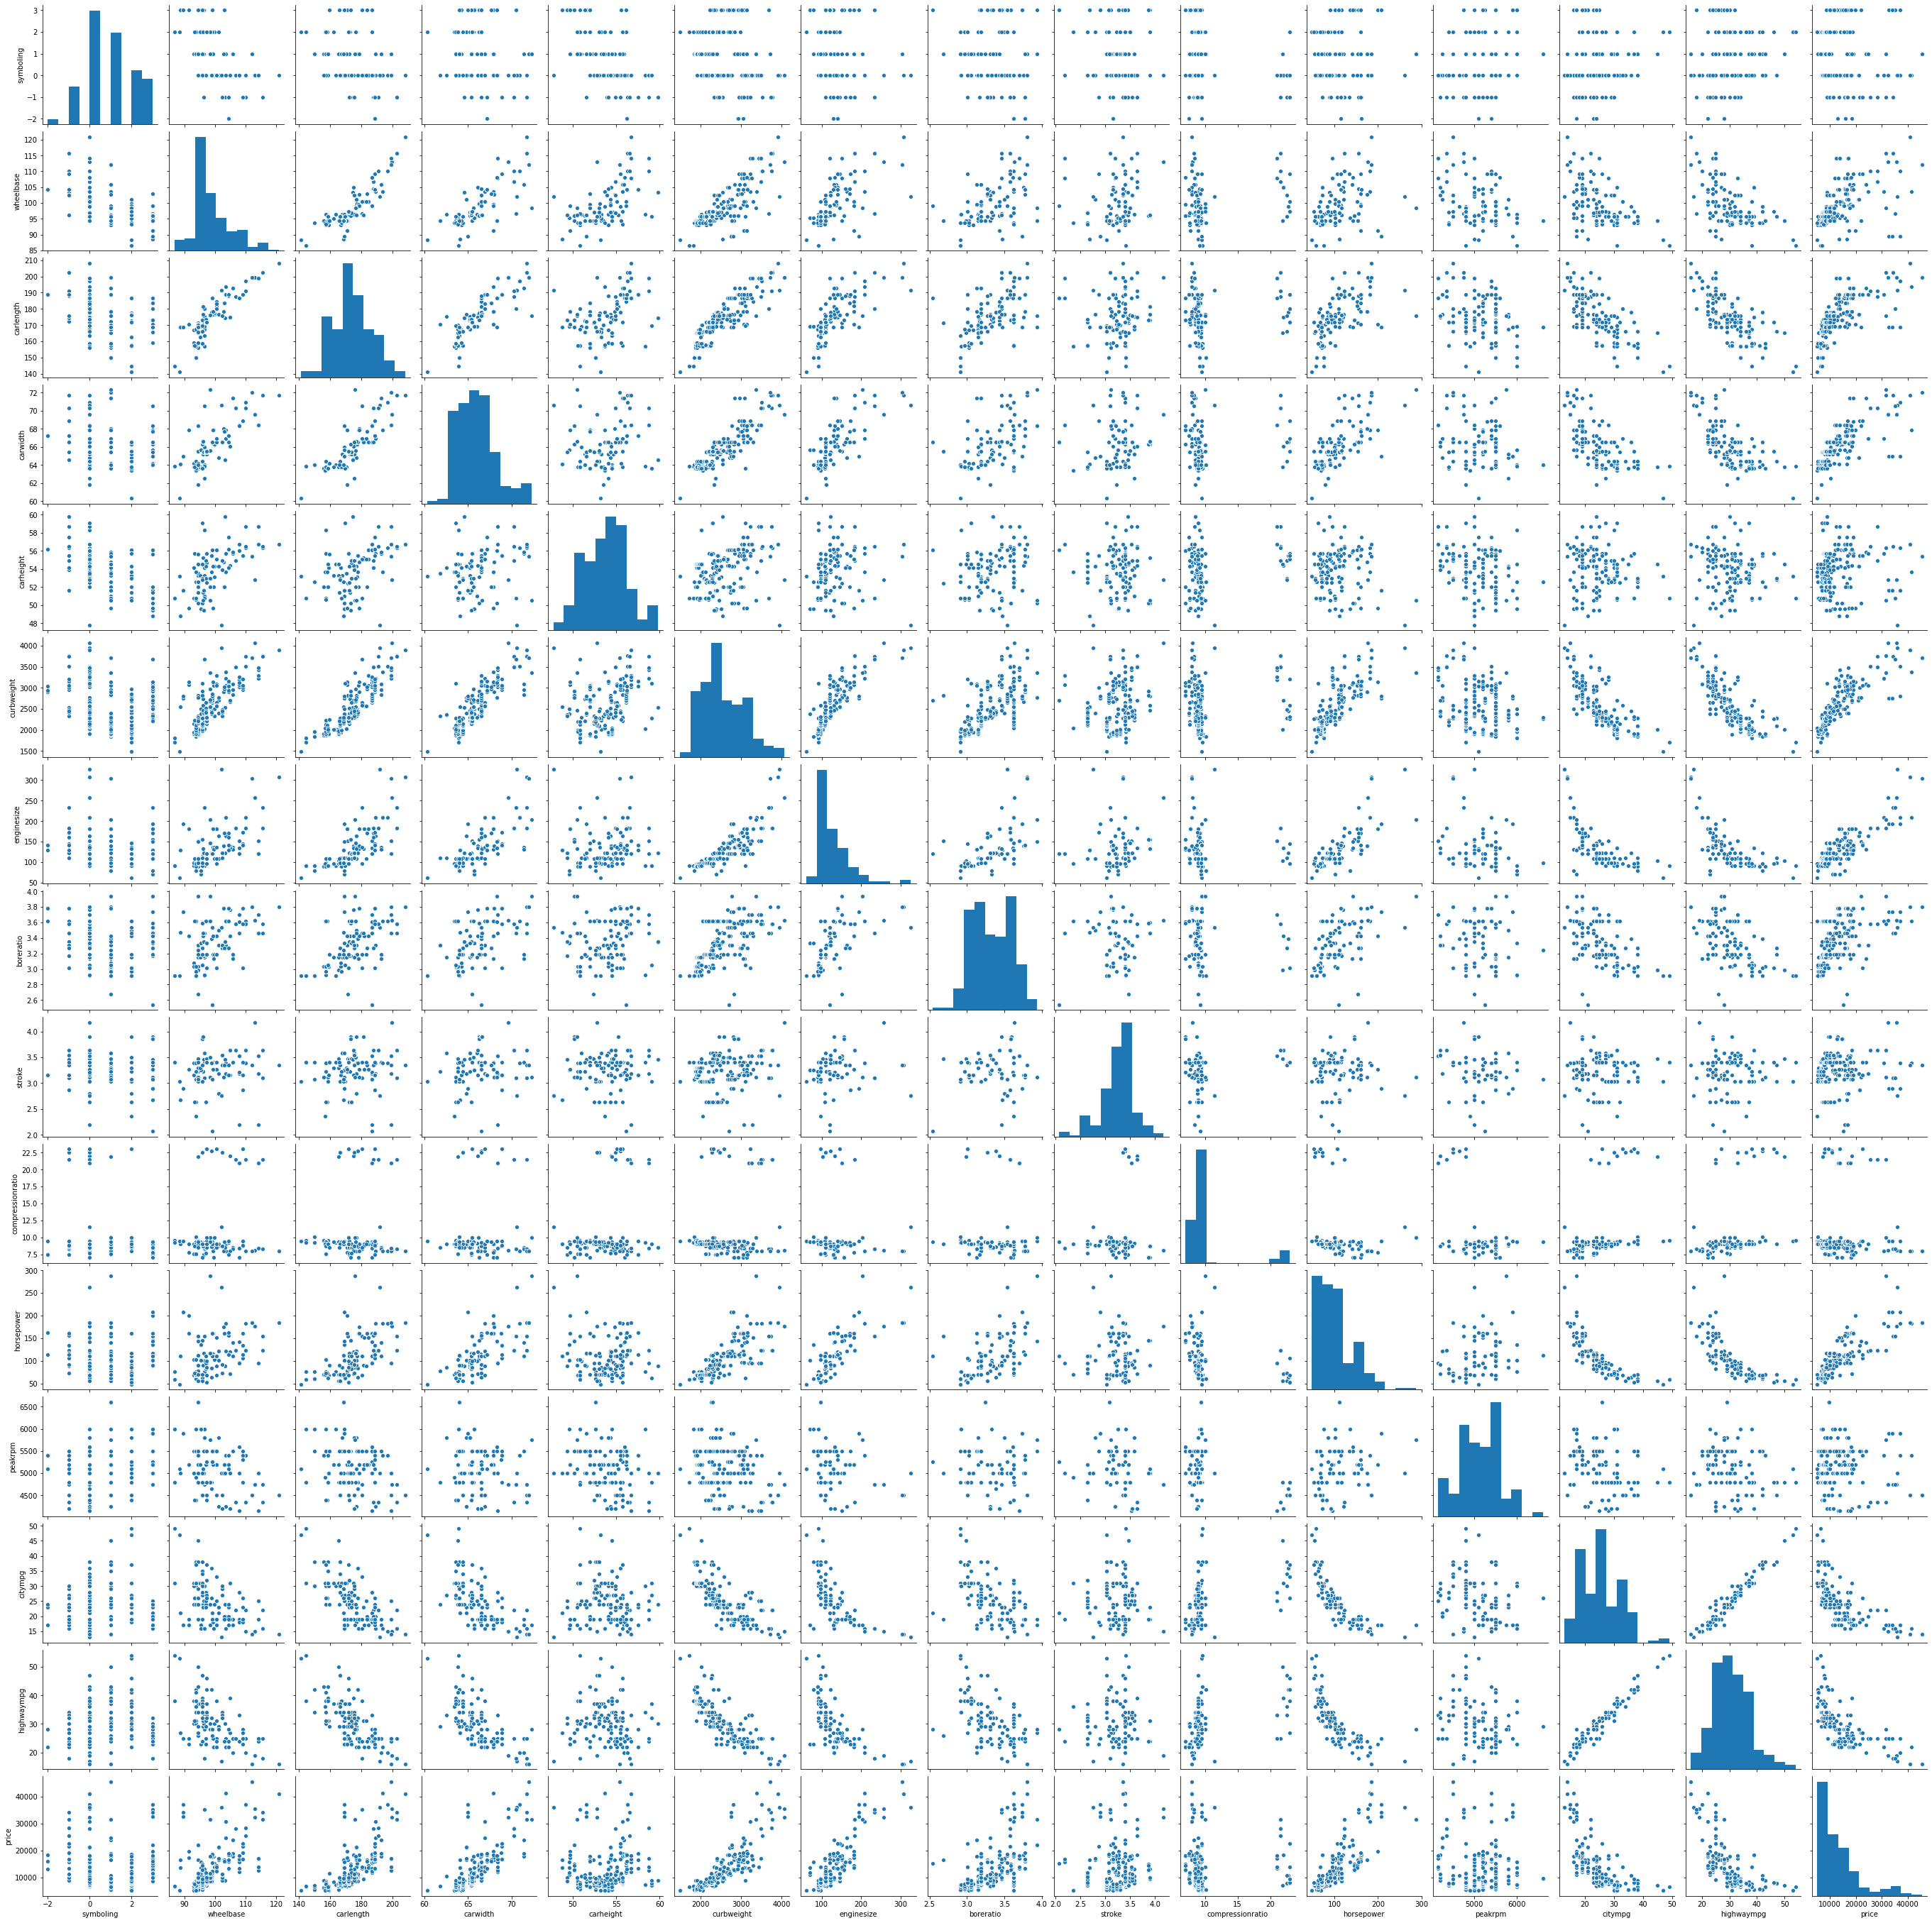

In [34]:
sns.pairplot(df)

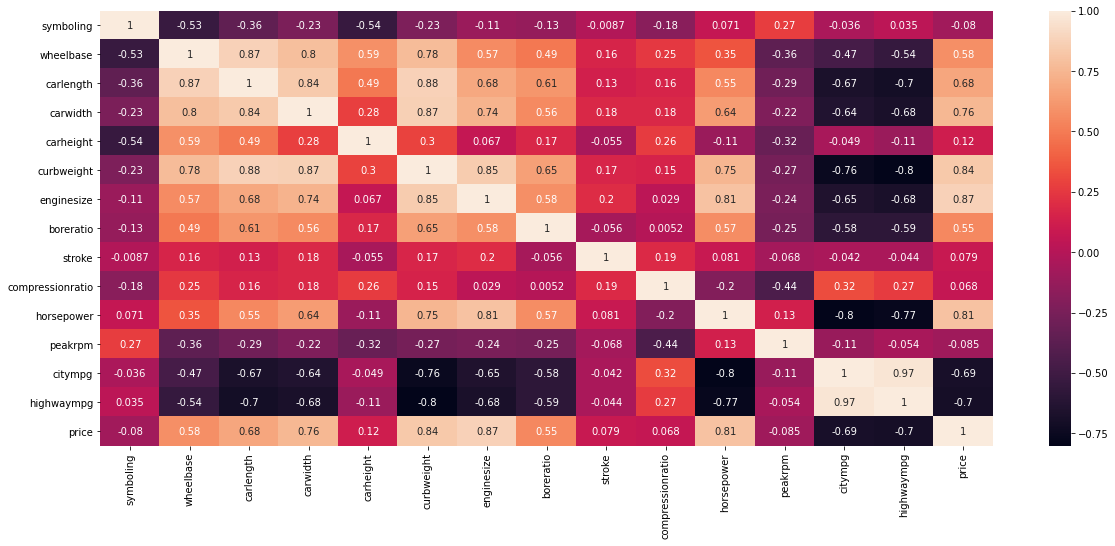

In [35]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot= True)

INFERENCE:
1. enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
2. citympg, highwaympg - seem to have a significant negative correlation with price.

In [50]:
# New Feature:
df['fueleconomy'] = 0.55* df['citympg'] + 0.45* df['highwaympg']

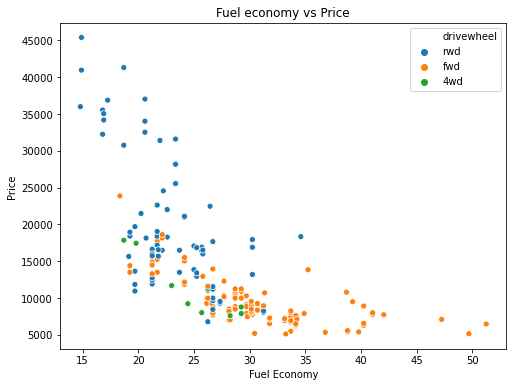

<Figure size 432x288 with 0 Axes>

In [37]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x= df['fueleconomy'],y= df['price'],hue= df['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

As fuel economy increases, car price decreases

In [38]:
np.corrcoef(df['fueleconomy'], df['price'])

array([[ 1.        , -0.69621253],
       [-0.69621253,  1.        ]])

As we can see, there is a negative correlation between fuel economy and price. Equal to -0.696

In [39]:
# encoding ordinal categorical features

df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})
df['cylindernumber'] = df['cylindernumber'].map({'two':2, 'three': 3, 'four':4, 'five': 5, 'six':6, 'eight':8, 'twelve':12})

In [53]:
df.drop(columns = ['fueleconomy', 'CarName'],axis=1, inplace= True)

### Train test split

In [55]:
X= df.drop('price', axis=1)
y= df['price']

In [56]:
X = pd.get_dummies(X, drop_first= True)
X.head()

symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
car_ID                                                                     
1               3           2       88.6      168.8      64.1       48.8   
2               3           2       88.6      168.8      64.1       48.8   
3               1           2       94.5      171.2      65.5       52.4   
4               2           4       99.8      176.6      66.2       54.3   
5               2           4       99.4      176.6      66.4       54.3   

        curbweight  cylindernumber  enginesize  boreratio  ...  \
car_ID                                                     ...   
1             2548               4         130       3.47  ...   
2             2548               4         130       3.47  ...   
3             2823               6         152       2.68  ...   
4             2337               4         109       3.19  ...   
5             2824               5         136       3.19  ...   

        CarCompany_nissan  CarCompany_peugeot  CarCompany_plymouth  \
car_ID                                                               
1                       0                   0                    0   
2                       0                   0                    0   
3                       0                   0                    0   
4                       0                   0                    0   
5                       0                   0                    0   

        CarCompany_porsche  CarCompany_renault  CarCompany_saab  \
car_ID                                                            
1                        0                   0                0   
2                        0                   0                0   
3                        0                   0                0   
4                        0                   0                0   
5                        0                   0                0   

        CarCompany_subaru  CarCompany_toyota  CarCompany_volkswagen  \
car_ID                                                                
1                       0                  0                      0   
2                       0                  0                      0   
3                       0                  0                      0   
4                       0                  0                      0   
5                       0                  0                      0   

        CarCompany_volvo  
car_ID                    
1                      0  
2                      0  
3                      0  
4                      0  
5                      0  

[5 rows x 59 columns]

In [57]:
X.shape

(205, 59)

In [64]:
# checking for multicollinearity using `VIF`

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif)

                 Features           VIF
0               symboling  6.266245e+00
1              doornumber  3.728616e+00
2               wheelbase  1.883517e+01
3               carlength  2.269642e+01
4                carwidth  1.465185e+01
5               carheight  7.304687e+00
6              curbweight  4.083151e+01
7          cylindernumber  2.874438e+01
8              enginesize  6.357978e+01
9               boreratio  1.008866e+01
10                 stroke  5.124240e+00
11       compressionratio  1.767388e+02
12             horsepower  4.459772e+01
13                peakrpm  5.864992e+00
14                citympg  4.954043e+01
15             highwaympg  4.118672e+01
16           fueltype_gas  1.459758e+04
17       aspiration_turbo  6.434499e+00
18        carbody_hardtop  3.389671e+00
19      carbody_hatchback  1.730320e+01
20          carbody_sedan  2.237045e+01
21          carbody_wagon  1.132641e+01
22         drivewheel_fwd  1.209449e+01
23         drivewheel_rwd  1.917689e+01


C:\Users\master\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning:

divide by zero encountered in double_scalars



In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.30, random_state= 101)

In [67]:
# scaling data

from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

## Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [69]:
lr.score(X_train, y_train)

0.9801055383135125

In [70]:
lr.score(X_test, y_test)

0.8827164998765479

In [71]:
pd.DataFrame(data= lr.coef_, index= X.columns, columns=['Coefficients'])

Coefficients
symboling                 17.070063
doornumber               169.039677
wheelbase               1219.862837
carlength               -169.205780
carwidth                1117.459288
carheight               -631.330132
curbweight              1957.909166
cylindernumber         -1203.175204
enginesize              4239.211971
boreratio              -2045.251826
stroke                  -617.267692
compressionratio       -1875.509164
horsepower              1201.052131
peakrpm                  553.084781
citympg                  645.401206
highwaympg                45.030022
fueltype_gas            -700.501346
aspiration_turbo         650.976509
carbody_hardtop         -752.440792
carbody_hatchback      -2220.356121
carbody_sedan          -2251.128495
carbody_wagon          -1669.548914
drivewheel_fwd          -368.794379
drivewheel_rwd          -252.472389
enginelocation_rear      795.865276
enginetype_dohcv         -27.125239
enginetype_l              94.301886
enginetype_ohc           196.676358
enginetype_ohcf          532.005055
enginetype_ohcv         -275.052501
enginetype_rotor         925.502939
fuelsystem_2bbl          164.045548
fuelsystem_4bbl         -163.146621
fuelsystem_idi           700.501346
fuelsystem_mfi          -105.792129
fuelsystem_mpfi         -432.311771
fuelsystem_spdi         -202.280125
fuelsystem_spfi            2.687863
CarCompany_audi          564.561865
CarCompany_bmw          1700.222903
CarCompany_buick        1577.291978
CarCompany_chevrolet    -136.720144
CarCompany_dodge        -276.507873
CarCompany_honda         -33.091441
CarCompany_isuzu         172.183656
CarCompany_jaguar        366.936161
CarCompany_mazda         143.987604
CarCompany_mercury       117.135820
CarCompany_mitsubishi   -495.842117
CarCompany_nissan        123.945054
CarCompany_peugeot        94.301886
CarCompany_plymouth     -229.558111
CarCompany_porsche      1896.183760
CarCompany_renault       165.090259
CarCompany_saab          896.584752
CarCompany_subaru        120.551625
CarCompany_toyota        166.723336
CarCompany_volkswagen    353.093553
CarCompany_volvo         712.811354

In [73]:
lr.intercept_

13718.534965034958

#### predictions

In [74]:
predictions= lr.predict(X_test)

In [75]:
predictions

array([ 6521.10426029,  9130.29117091, 18480.32271127,  8169.33309182,
       14117.34102944, 16119.38279977, 14600.24081228,  5831.82067186,
        9031.69508976,  7796.35032756, 11956.65529277, 11764.08111479,
        6323.65544222,  7036.49722135, 11627.52986092, 10932.50956333,
        8196.89330918,  9738.0306854 ,  6488.89168603,  5940.80438393,
       10584.79273662,  9356.62218692,  6372.42474488,  6645.90473522,
       11018.97854573, 32576.65889891,  6249.41247759,  6125.52109714,
        8145.36184024,  9660.03071288,  6905.15990722, 12735.60485241,
       20213.49947592, 15667.8725879 , 21735.18527816, 14728.14126349,
        6481.08514087,  5898.4984116 , 10182.64121767,  9507.00784215,
        6086.77571545,  6726.76899873, 37576.39621299, 18451.35256931,
        6567.10338833, 30973.46733555,  6064.82033215,  9003.17108236,
       24063.16769742, 18702.46228217,   857.72082079, 10120.80783754,
        6990.24181669, 17392.46679494, 29808.66064378, 13495.        ,
      

In [76]:
y_test

car_ID
121     6229.000
186     8195.000
181    15690.000
120     7957.000
110    12440.000
         ...    
171    11199.000
178    11248.000
10     17859.167
160     7788.000
37      7295.000
Name: price, Length: 62, dtype: float64

#### Evaluation

In [91]:
px.scatter(x= y_test, y= predictions,trendline= 'ols')

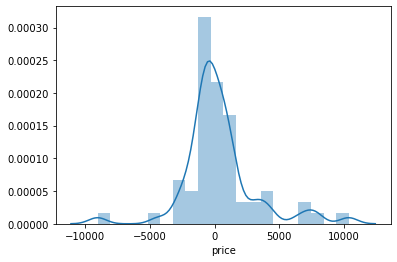

In [81]:
sns.distplot((y_test - predictions)) 

Normal distribution of the error term (actual-predicted). It satisfies one of the assumptions of linear regression

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE : ", mean_absolute_error(y_test, predictions))
print("MSE : ", mean_squared_error(y_test, predictions))
print("RMSE : ",  np.sqrt(mean_squared_error(y_test, predictions)))

MAE :  1791.829966026822
MSE :  8011852.271581543
RMSE :  2830.521554692976


In [86]:
print("R-square of the model is : ", lr.score(X_test, y_test))

R-square of the model is :  0.8827164998765479
